<a href="https://colab.research.google.com/github/nirmalapudota/designamica/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['annotations.csv']), header = None, error_bad_lines = False) 
df.head()

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,0,1,2,3,4,5,6,7,8,9
0,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
1,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
2,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
3,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
4,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants


In [176]:
df2 = df.rename(columns = {0: 'id', 1: 'gender', 2: 'masterCategory', 3: 'subCategory', 4: 'articleType', 5: 'baseColour', 6: 'season', 7: 'year', 8: 'usage', 9: 'productDisplayName', 10: 'id'})
df2 = df2.iloc[1:]
df2.head()
df2.shape

(44424, 10)

In [177]:
df1 = df.rename(columns = {0: 'id', 1: 'gender', 2: 'masterCategory', 3: 'subCategory', 4: 'articleType', 5: 'baseColour', 6: 'season', 7: 'year', 8: 'usage', 9: 'productDisplayName', 10: 'id'})

In [178]:
df1 = df1.iloc[1:]
df1.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
1,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
2,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
3,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
4,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants
5,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt


In [179]:
df1 = df1[['id', 'productDisplayName']]

In [181]:
df1.head()

,id,productDisplayName
1,15970,Turtle Check Men Navy Blue Shirt
2,39386,Peter England Men Party Blue Jeans
3,59263,Titan Women Silver Watch
4,21379,Manchester United Men Solid Black Track Pants
5,53759,Puma Men Grey T-shirt


In [ ]:
#using sent2vec package
from sent2vec.vectorizer import Vectorizer

In [183]:
df1.dtypes
df1['productDisplayName'].values.astype('U')
df1.dtypes

id                    object
productDisplayName    object
dtype: object

In [184]:
sentences = df1['productDisplayName'].tolist()
sentences[0]

'Turtle Check Men Navy Blue Shirt'

In [ ]:
vectorizer = Vectorizer()

In [ ]:
vectorizer.bert(sentences[:3000])
vectors = vectorizer.vectors

In [ ]:
print(len(vectors))

3000


In [ ]:
'''
vectors = []
for i in range(len(sentences)):
  vectorizer.bert(sentences[i:i+500])
  temp_vectors = vectorizer.vectors
  vectors.extend(temp_vectors)
print(vectors)
print(len(vectors))
'''

In [185]:
#using sentence-transfomers package
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [186]:
sentence_embeddings = model.encode(sentences[:3000])

In [188]:
print(len(sentence_embeddings))

3000


In [189]:
query = input()
query_embedding = model.encode(query)

Titan watch


In [190]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

from scipy import spatial

distances = []
dict = {}

for i in range(4):
  distances.append(spatial.distance.cosine(query_embedding, sentence_embeddings[i]))
  dict[distances[i]] = i
  print( "Serial Number is " + str(i) + "  distance between the query and this sentence is  " + str(distances[i]) + "  the sentence is  " + sentences[i])

distances.sort()

print("\nEnter the number of results you want to see")
top_n = int(input())
print("\n")

for i in range(top_n):
  print("The description similar to the query is " + color.BOLD + sentences[dict[distances[i]]] + color.END + " and photo Id is " + color.BOLD + str(df2.loc[dict[distances[i]] +1 , 'id']) + color.END)



Serial Number is 0  distance between the query and this sentence is  0.7002772092819214  the sentence is  Turtle Check Men Navy Blue Shirt
Serial Number is 1  distance between the query and this sentence is  0.7854895293712616  the sentence is  Peter England Men Party Blue Jeans
Serial Number is 2  distance between the query and this sentence is  0.36133474111557007  the sentence is  Titan Women Silver Watch
Serial Number is 3  distance between the query and this sentence is  0.7068512737751007  the sentence is  Manchester United Men Solid Black Track Pants

Enter the number of results you want to see
2


The description similar to the query is Titan Women Silver Watch and photo Id is 59263
The description similar to the query is Turtle Check Men Navy Blue Shirt and photo Id is 15970


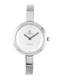

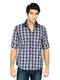

In [191]:
from IPython.display import Image, display

for i in range(top_n):
  x = str(df2.loc[ dict[distances[i]]+1 , 'id']) + '.jpg'
  display(Image(x))
  print("\n")

In [196]:
#generating vocabulary using the descriptions given
vocabulary = set()
image_ids = []
for i in range(len(df2.index)):
  [vocabulary.update(str(df2.loc[i+1, 'productDisplayName']).split())]
  image_ids.append(str(df2.loc[i+1, 'id']))
print('Size of vocabulary is %d' % len(vocabulary))

Size of vocabulary is 9434


In [194]:
#not filtering the vocabulary by considering the frequency pf words

In [256]:
train_descriptions = {}
for i in range(len(df2.index)):
  updated_description = 'startseq ' + str(df2.loc[i+1, 'productDisplayName']) + ' endseq'
  train_descriptions[str(df2.loc[i+1, 'id'])] = updated_description

#print(train_descriptions)

In [257]:
count = 0
for i in range(1163, 60000+1):
  if str(i) not in image_ids:
    train_descriptions[str(i)] = ''
    count+=1

In [258]:
print(count)

14414


In [259]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
model = InceptionV3(weights='imagenet')
model_new = Model(model.input, model.layers[-2].output)

In [255]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

img_path = '15970.jpg'
#TODO: generate feature vector for images.
